# Data Preparation

## Importing Libraries

In [4]:
import pandas as pd
# ensure openpyxl==3.1.0, version 3.1.1 has a bug

In [5]:
from io import BytesIO
from zipfile import ZipFile
from urllib.request import urlopen
import datetime

## Downloading Data

In [6]:
MajorRoadsEmissionsURL = 'https://data.london.gov.uk/download/london-atmospheric-emissions-inventory-2013/8c520de2-c518-4e64-932c-0071ac826742/LAEI2013_MajorRoads_EmissionsbyLink_2013.xlsx'
xls = pd.ExcelFile(MajorRoadsEmissionsURL)

In [7]:
SupportingDocURL = 'https://data.london.gov.uk/download/london-atmospheric-emissions-inventory-2013/1f3755f3-dae8-4d39-b9b4-0cc7adb4e826/1.%20Supporting%20Information.zip'
resp = urlopen(SupportingDocURL)

In [8]:
DocZip = ZipFile(BytesIO(resp.read()))
DocZip.namelist()[:10]

['1. Supporting Information/',
 '1. Supporting Information/1. Road Traffic Data/',
 '1. Supporting Information/1. Road Traffic Data/Excel/',
 '1. Supporting Information/1. Road Traffic Data/Excel/LAEI2013_2008_AADT-VKM.xlsx',
 '1. Supporting Information/1. Road Traffic Data/Excel/LAEI2013_2010_AADT-VKM.xlsx',
 '1. Supporting Information/1. Road Traffic Data/Excel/LAEI2013_2013_AADT-VKM.xlsx',
 '1. Supporting Information/1. Road Traffic Data/Excel/LAEI2013_2020_AADT-VKM.xlsx',
 '1. Supporting Information/1. Road Traffic Data/Excel/LAEI2013_2025_AADT-VKM.xlsx',
 '1. Supporting Information/1. Road Traffic Data/Excel/LAEI2013_2030_AADT-VKM.xlsx',
 '1. Supporting Information/1. Road Traffic Data/Excel/LAEI2013_VKM_AllYears_Summary.xlsx']

## Load Data into dataframes

### Road Emissions Data

In [9]:
xls.sheet_names

['2013 LTS Rds', '2013 Other Major Rds']

In [10]:
df_LTSroads = pd.read_excel(xls, '2013 LTS Rds')
print(df_LTSroads.shape)
df_LTSroads.head()

(366220, 32)


,GridId,Toid,GRID_ExactCut_ID,Location_ExactCut,BoroughName_ExactCut,Lts,Length (m),Emissions,Year,Pollutant,...,Artic5Axle,Artic6Axle,PetrolCar,DieselCar,PetrolLgv,DieselLgv,LtBus,Coach,ElectricCar,ElectricLgv
0,6253,4000000027908919,24,External,NonGLA,18898,50.761449,DFT,2013,CO2,...,0.241372,0.190560,8.761443,4.810774,0.037550,1.735121,0.0,0.0,0.0,0.0
1,6253,4000000027947931,24,External,NonGLA,18895,28.592125,DFT,2013,CO2,...,0.000000,0.000000,0.015535,0.008576,0.000000,0.000000,0.0,0.0,0.0,0.0
2,6253,4000000028013383,24,External,NonGLA,15816,5.101391,DFT,2013,CO2,...,0.027271,0.021509,0.939028,0.518684,0.004055,0.184415,0.0,0.0,0.0,0.0
3,6253,4000000028025820,24,External,NonGLA,15816,3.757501,DFT,2013,CO2,...,0.020087,0.015843,0.691654,0.382044,0.002987,0.135834,0.0,0.0,0.0,0.0
4,6253,4000000028029388,24,External,NonGLA,15816,1.624593,DFT,2013,CO2,...,0.008685,0.006850,0.299044,0.165180,0.001292,0.058729,0.0,0.0,0.0,0.0


In [11]:
df_OtherMajorRoads = pd.read_excel(xls, '2013 Other Major Rds')
print(df_OtherMajorRoads.shape)
df_OtherMajorRoads.head()

(513740, 32)


,GridId,Toid,GRID_ExactCut_ID,Location_ExactCut,BoroughName_ExactCut,DotRef,Length (m),Emissions,Year,Pollutant,...,Artic5Axle,Artic6Axle,PetrolCar,DieselCar,PetrolLgv,DieselLgv,LtBus,Coach,ElectricCar,ElectricLgv
0,5911,4000000027989878,2,External,NonGLA,28440,9.714495,DFT,2013,CO2,...,3.006694,12.549219,18.791658,19.630267,0.279151,11.005820,0.000000,0.744254,0.0,0.0
1,5911,4000000027989880,2,External,NonGLA,28440,0.000000,DFT,2013,CO2,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
2,5911,4000000027989882,2,External,NonGLA,57226,8.577192,DFT,2013,CO2,...,0.760333,2.446611,19.478135,10.300493,0.120149,7.734197,0.754408,0.868990,0.0,0.0
3,5911,4000000028014332,2,External,NonGLA,57226,9.347936,DFT,2013,CO2,...,0.823130,2.648621,20.173154,10.553940,0.123945,7.418739,0.820669,0.897038,0.0,0.0
4,5911,4000000027888882,2,External,NonGLA,28440,0.000000,DFT,2013,CO2,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0


In [12]:
# concat  the two dataframes
df_RoadEmissions = pd.concat([df_LTSroads, df_OtherMajorRoads], ignore_index=True)
print(df_RoadEmissions.shape)
df_RoadEmissions.head()

(879960, 33)


,GridId,Toid,GRID_ExactCut_ID,Location_ExactCut,BoroughName_ExactCut,Lts,Length (m),Emissions,Year,Pollutant,...,Artic6Axle,PetrolCar,DieselCar,PetrolLgv,DieselLgv,LtBus,Coach,ElectricCar,ElectricLgv,DotRef
0,6253,4000000027908919,24,External,NonGLA,18898.0,50.761449,DFT,2013,CO2,...,0.190560,8.761443,4.810774,0.037550,1.735121,0.0,0.0,0.0,0.0,NaN
1,6253,4000000027947931,24,External,NonGLA,18895.0,28.592125,DFT,2013,CO2,...,0.000000,0.015535,0.008576,0.000000,0.000000,0.0,0.0,0.0,0.0,NaN
2,6253,4000000028013383,24,External,NonGLA,15816.0,5.101391,DFT,2013,CO2,...,0.021509,0.939028,0.518684,0.004055,0.184415,0.0,0.0,0.0,0.0,NaN
3,6253,4000000028025820,24,External,NonGLA,15816.0,3.757501,DFT,2013,CO2,...,0.015843,0.691654,0.382044,0.002987,0.135834,0.0,0.0,0.0,0.0,NaN
4,6253,4000000028029388,24,External,NonGLA,15816.0,1.624593,DFT,2013,CO2,...,0.006850,0.299044,0.165180,0.001292,0.058729,0.0,0.0,0.0,0.0,NaN


### Traffic Data

In [13]:
traffic_excel = DocZip.read('1. Supporting Information/1. Road Traffic Data/Excel/LAEI2013_2013_AADT-VKM.xlsx')
traffic_xls = pd.ExcelFile(BytesIO(traffic_excel))

In [14]:
df_AADT = pd.read_excel(traffic_xls, 'MajorGrid_AADTandVKM_2013')
print(df_AADT.shape)
df_AADT.head()

(87999, 44)


,RowID,Year,Toid,GRID_ExactCut_ID,Location_ExactCut,BoroughName_ExactCut,TLRN,MotorwayNumber,AADT Motorcycle,AADT Taxi,...,VKM_Coach,VKM_Rigid2Axle,VKM_Rigid3Axle,VKM_Rigid4Axle,VKM_Artic3Axle,VKM_Artic5Axle,VKM_Artic6Axle,VKM_ElectricCar,VKM_ElectricLgv,VKM_TOTAL
0,1.0,2013.0,4.000000e+15,836.0,Outer,Hillingdon,Other,Other,88.301916,77.112580,...,149.248696,293.680300,55.978941,39.030966,16.191367,10.970609,3.993946,4.335614,1.235289,16605.011414
1,2.0,2013.0,4.000000e+15,2217.0,Outer,Hillingdon,Other,Other,88.301916,77.112580,...,98.338925,193.503902,36.884134,25.717231,10.668379,7.228458,2.631583,2.856706,0.813924,10940.494996
2,3.0,2013.0,4.000000e+15,282.0,External,NonGLA,Other,Other,310.363572,100.322495,...,1657.075319,12950.212101,3011.364039,2861.551314,1710.809301,1966.897025,1647.110606,221.806380,47.635028,796735.125068
3,4.0,2013.0,4.000000e+15,873.0,Outer,Hillingdon,Other,Other,39.473081,144.548284,...,118.008843,9777.985094,2051.227418,1024.275647,470.758531,815.631678,1959.389833,78.775616,15.287825,284144.265992
4,5.0,2013.0,4.000000e+15,2930.0,Outer,Hillingdon,Other,Other,39.473081,144.548284,...,401.216526,33244.027352,6973.937855,3482.419671,1600.524988,2773.054115,6661.700602,267.828056,51.976850,966057.900401


### Join the dataframes

In [15]:
# left join df_RoadEmissions and df_AADT on the ['Toid' and 'GRID_ExactCut_ID'] column
df = pd.merge(df_RoadEmissions, df_AADT, how='left',
            left_on=['Toid', 'GRID_ExactCut_ID'],
            right_on=['Toid', 'GRID_ExactCut_ID'])
print(df.shape)
df.head()

(879960, 75)


,GridId,Toid,GRID_ExactCut_ID,Location_ExactCut_x,BoroughName_ExactCut_x,Lts,Length (m)_x,Emissions,Year_x,Pollutant,...,VKM_Coach,VKM_Rigid2Axle,VKM_Rigid3Axle,VKM_Rigid4Axle,VKM_Artic3Axle,VKM_Artic5Axle,VKM_Artic6Axle,VKM_ElectricCar,VKM_ElectricLgv,VKM_TOTAL
0,6253,4000000027908919,24,External,NonGLA,18898.0,50.761449,DFT,2013,CO2,...,0.0,2383.880434,229.558857,335.509098,194.242109,247.217230,176.583736,28.990862,5.460174,104036.993985
1,6253,4000000027947931,24,External,NonGLA,18895.0,28.592125,DFT,2013,CO2,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.046589,0.000000,140.050860
2,6253,4000000028013383,24,External,NonGLA,15816.0,5.101391,DFT,2013,CO2,...,0.0,239.573680,23.070058,33.717777,19.520818,24.844678,17.746199,2.913505,0.548733,10455.442789
3,6253,4000000028025820,24,External,NonGLA,15816.0,3.757501,DFT,2013,CO2,...,0.0,176.461358,16.992575,24.835302,14.378333,18.299696,13.071212,2.145983,0.404177,7701.103189
4,6253,4000000028029388,24,External,NonGLA,15816.0,1.624593,DFT,2013,CO2,...,0.0,76.294807,7.346907,10.737788,6.216614,7.912054,5.651467,0.927837,0.174750,3329.647849


In [16]:
# remove unnecessary columns
columnstokeep = df.columns
for a in columnstokeep:
    if 'VKM' in a:
        columnstokeep = columnstokeep.drop(a)
df = df[columnstokeep]
print(df.shape)
df.head()

(879960, 58)


,GridId,Toid,GRID_ExactCut_ID,Location_ExactCut_x,BoroughName_ExactCut_x,Lts,Length (m)_x,Emissions,Year_x,Pollutant,...,AADT Rigid3Axle,AADT Rigid4Axle,AADT Artic3Axle,AADT Artic5Axle,AADT Artic6Axle,AADT ElectricCar,AADT ElectricLgv,AADT TOTAL,Speed (kph),Length (m)_y
0,6253,4000000027908919,24,External,NonGLA,18898.0,50.761449,DFT,2013,CO2,...,12.389882,18.108290,10.483747,13.342950,9.530679,1.564711,0.29470,5615.144325,42.269546,50.761449
1,6253,4000000027947931,24,External,NonGLA,18895.0,28.592125,DFT,2013,CO2,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.004464,0.00000,13.419814,32.236053,28.592125
2,6253,4000000028013383,24,External,NonGLA,15816.0,5.101391,DFT,2013,CO2,...,6.194941,9.054145,5.241873,6.671475,4.765339,0.782356,0.14735,2807.572163,35.051885,10.202783
3,6253,4000000028025820,24,External,NonGLA,15816.0,3.757501,DFT,2013,CO2,...,6.194941,9.054145,5.241873,6.671475,4.765339,0.782356,0.14735,2807.572163,35.051885,7.515003
4,6253,4000000028029388,24,External,NonGLA,15816.0,1.624593,DFT,2013,CO2,...,6.194941,9.054145,5.241873,6.671475,4.765339,0.782356,0.14735,2807.572163,35.051885,3.249186


In [17]:
df.columns

Index(['GridId', 'Toid', 'GRID_ExactCut_ID', 'Location_ExactCut_x',
       'BoroughName_ExactCut_x', 'Lts', 'Length (m)_x', 'Emissions', 'Year_x',
       'Pollutant', 'Emissions Unit', 'Motorcycle', 'Taxi', 'Car',
       'BusAndCoach', 'Lgv', 'Rigid', 'Artic', 'Rigid2Axle', 'Rigid3Axle',
       'Rigid4Axle', 'Artic3Axle', 'Artic5Axle', 'Artic6Axle', 'PetrolCar',
       'DieselCar', 'PetrolLgv', 'DieselLgv', 'LtBus', 'Coach', 'ElectricCar',
       'ElectricLgv', 'DotRef', 'RowID', 'Year_y', 'Location_ExactCut_y',
       'BoroughName_ExactCut_y', 'TLRN', 'MotorwayNumber', 'AADT Motorcycle',
       'AADT Taxi', 'AADT Pcar', 'AADT Dcar', 'AADT PLgv', 'AADT DLgv',
       'AADT LtBus', 'AADT Coach', 'AADT Rigid2Axle', 'AADT Rigid3Axle',
       'AADT Rigid4Axle', 'AADT Artic3Axle', 'AADT Artic5Axle',
       'AADT Artic6Axle', 'AADT ElectricCar', 'AADT ElectricLgv', 'AADT TOTAL',
       'Speed (kph)', 'Length (m)_y'],
      dtype='object')

## Classify columns to labels and targets

In [18]:
label = []
columnstokeep = df.columns
for a in columnstokeep:
    if 'AADT' in a:
        label = label + [a]
    elif 'Speed' in a:
        label = label + [a]
    elif 'Length' in a:
        label = label + [a]
label


['Length (m)_x',
 'AADT Motorcycle',
 'AADT Taxi',
 'AADT Pcar',
 'AADT Dcar',
 'AADT PLgv',
 'AADT DLgv',
 'AADT LtBus',
 'AADT Coach',
 'AADT Rigid2Axle',
 'AADT Rigid3Axle',
 'AADT Rigid4Axle',
 'AADT Artic3Axle',
 'AADT Artic5Axle',
 'AADT Artic6Axle',
 'AADT ElectricCar',
 'AADT ElectricLgv',
 'AADT TOTAL',
 'Speed (kph)',
 'Length (m)_y']

In [19]:
# remove irrelevant columns
label.remove('AADT TOTAL')
label.remove('Speed (kph)')
label.remove('Length (m)_y')
label

['Length (m)_x',
 'AADT Motorcycle',
 'AADT Taxi',
 'AADT Pcar',
 'AADT Dcar',
 'AADT PLgv',
 'AADT DLgv',
 'AADT LtBus',
 'AADT Coach',
 'AADT Rigid2Axle',
 'AADT Rigid3Axle',
 'AADT Rigid4Axle',
 'AADT Artic3Axle',
 'AADT Artic5Axle',
 'AADT Artic6Axle',
 'AADT ElectricCar',
 'AADT ElectricLgv']

In [20]:
target = ['Motorcycle', 'Taxi', 'Car',
          'BusAndCoach', 'Lgv', 'Rigid', 'Artic', 'Rigid2Axle', 'Rigid3Axle',
          'Rigid4Axle', 'Artic3Axle', 'Artic5Axle', 'Artic6Axle', 'PetrolCar',
          'DieselCar', 'PetrolLgv', 'DieselLgv', 'LtBus', 'Coach', 'ElectricCar',
          'ElectricLgv']


## Visualize the data

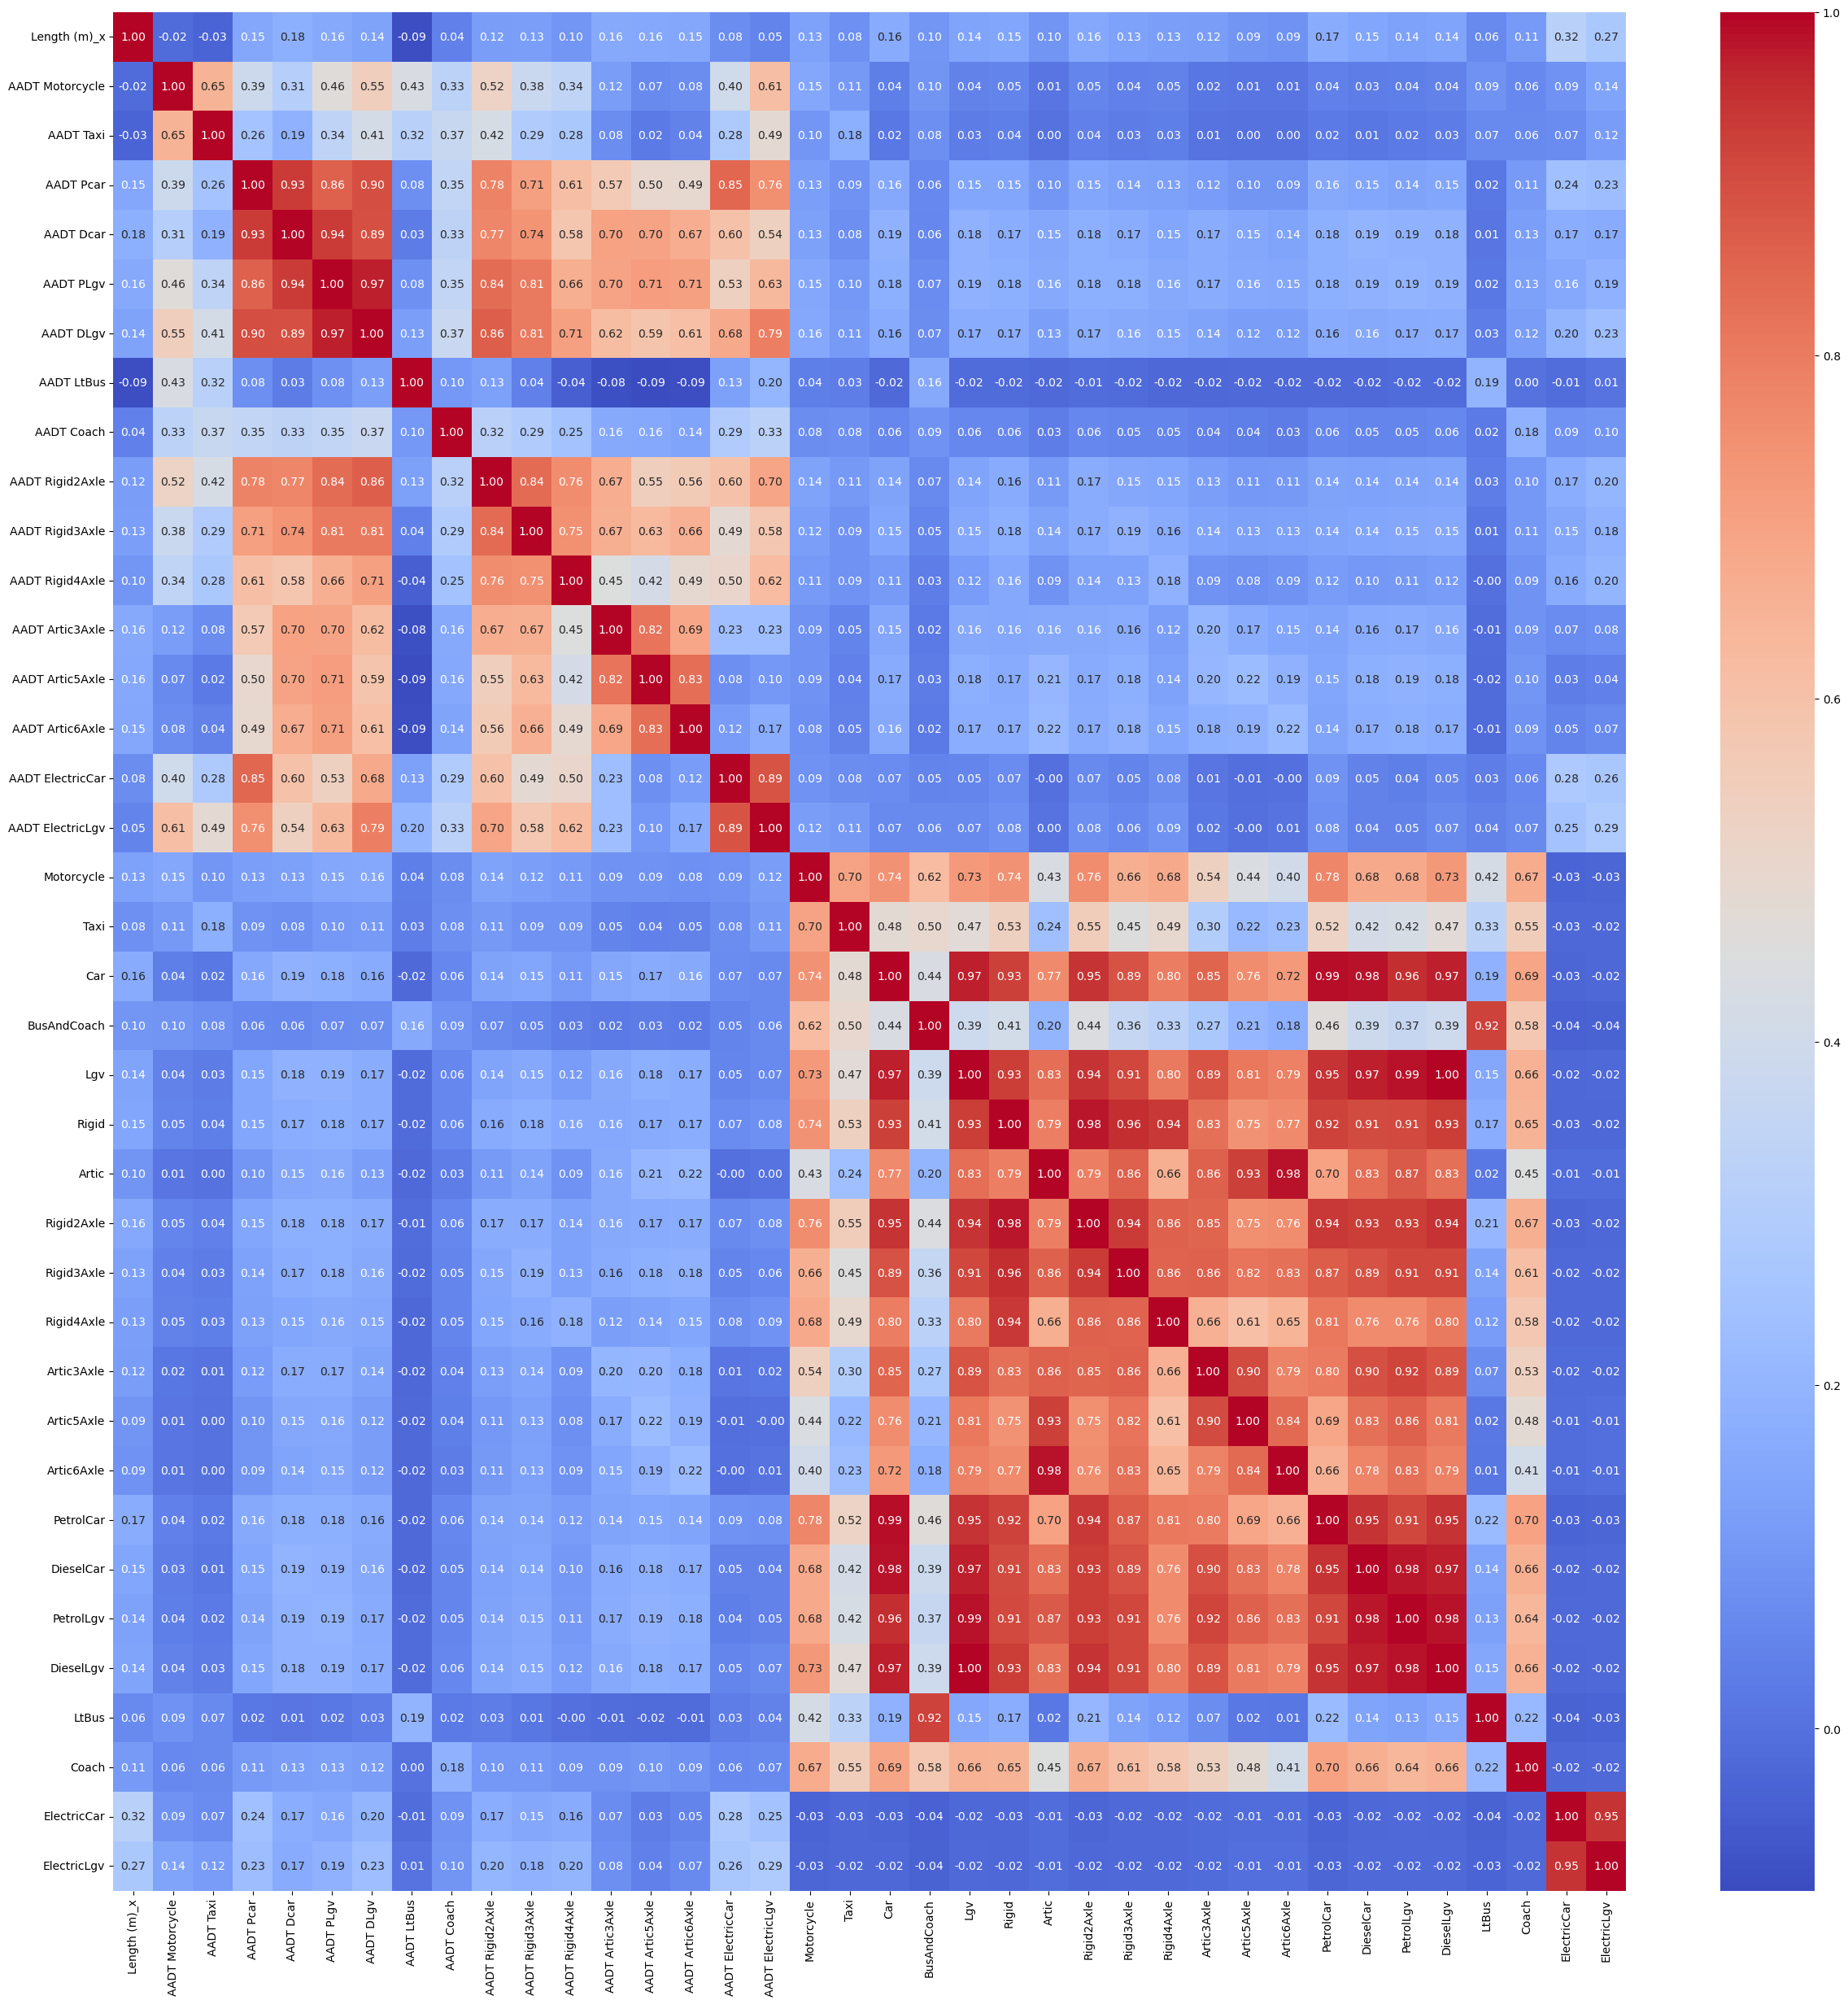

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# plot the correlation matrix
corr = df[label + target].corr()
plt.figure(figsize=(30,30))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm')
plt.show()


C:\Users\zhu\AppData\Local\Temp\ipykernel_22464\249945334.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[a])


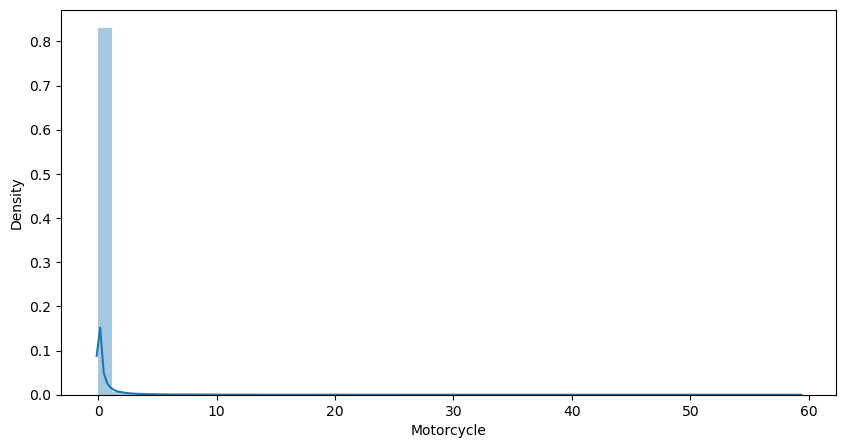

C:\Users\zhu\AppData\Local\Temp\ipykernel_22464\249945334.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[a])


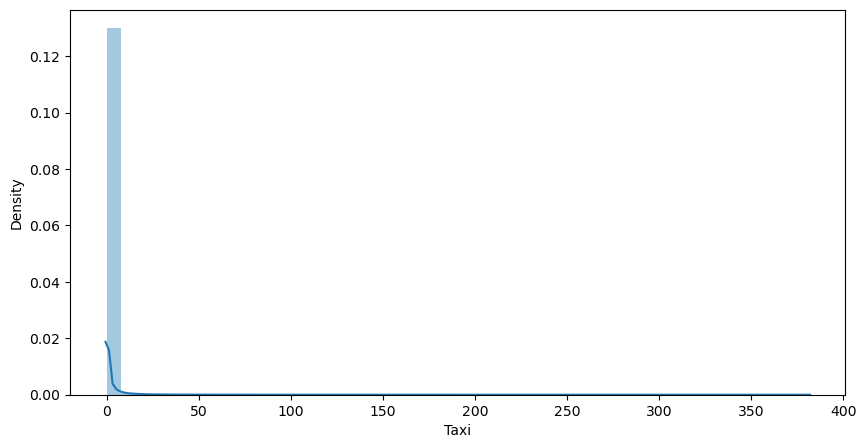

C:\Users\zhu\AppData\Local\Temp\ipykernel_22464\249945334.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[a])


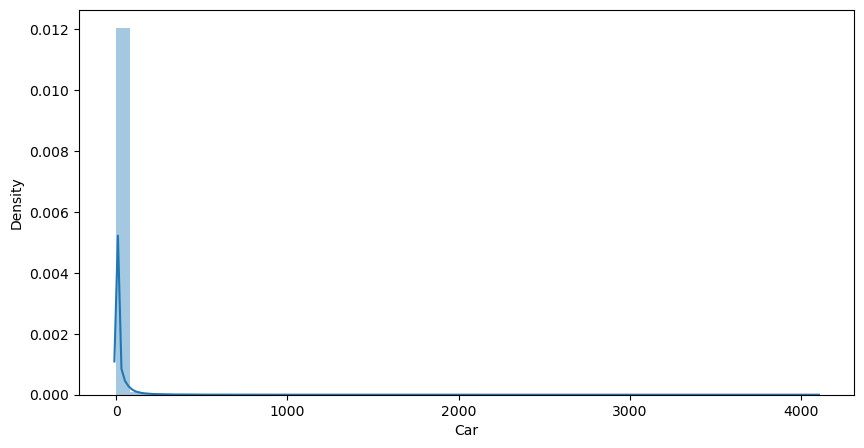

C:\Users\zhu\AppData\Local\Temp\ipykernel_22464\249945334.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[a])


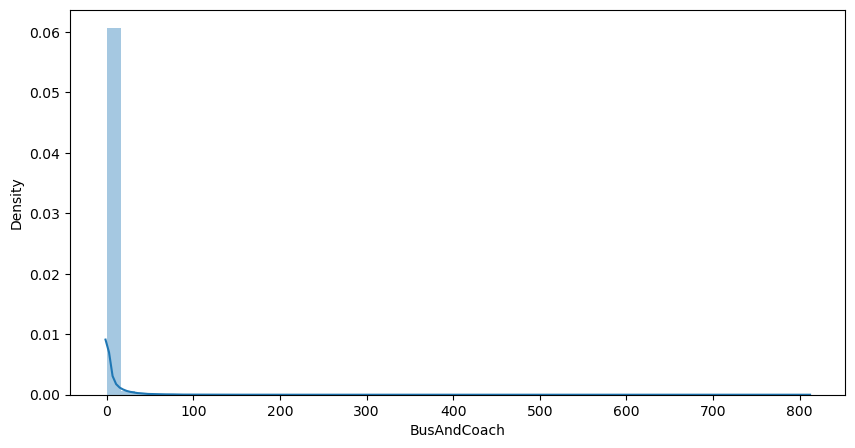

C:\Users\zhu\AppData\Local\Temp\ipykernel_22464\249945334.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[a])


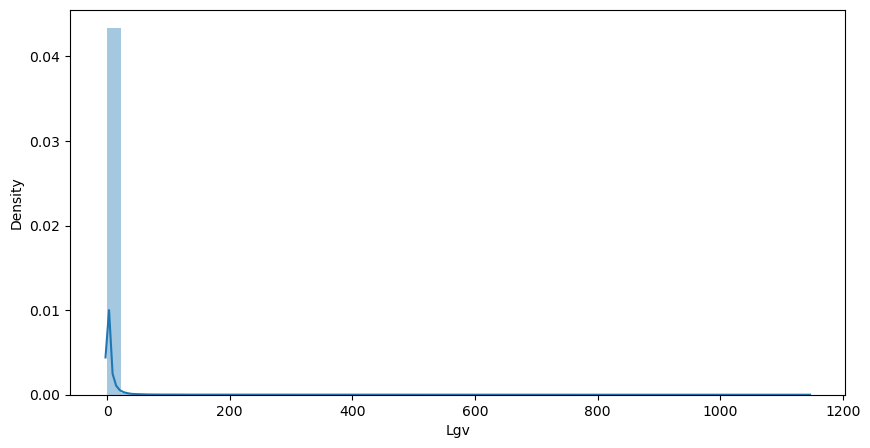

C:\Users\zhu\AppData\Local\Temp\ipykernel_22464\249945334.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[a])


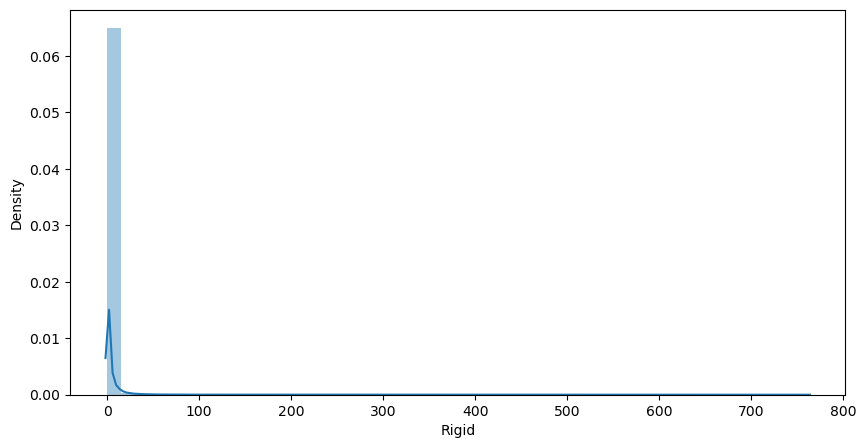

C:\Users\zhu\AppData\Local\Temp\ipykernel_22464\249945334.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[a])


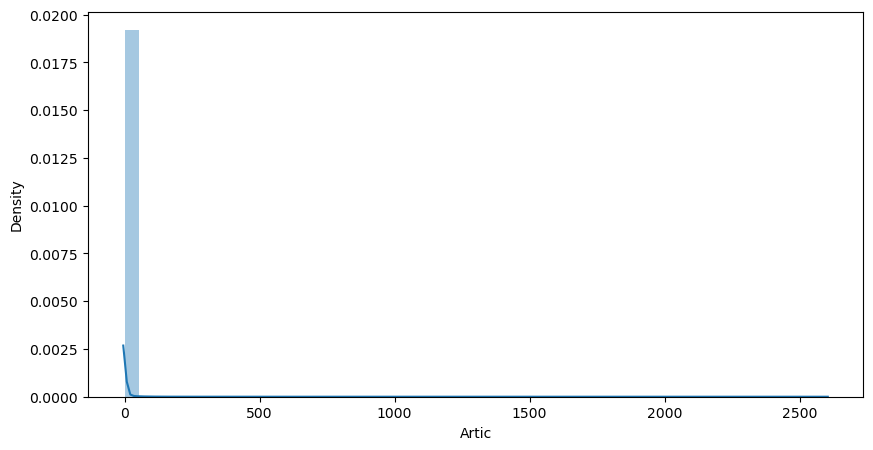

C:\Users\zhu\AppData\Local\Temp\ipykernel_22464\249945334.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[a])


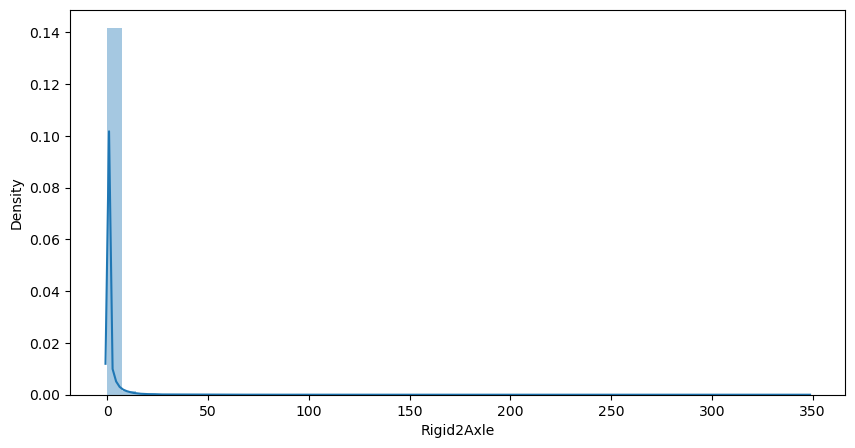

C:\Users\zhu\AppData\Local\Temp\ipykernel_22464\249945334.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[a])


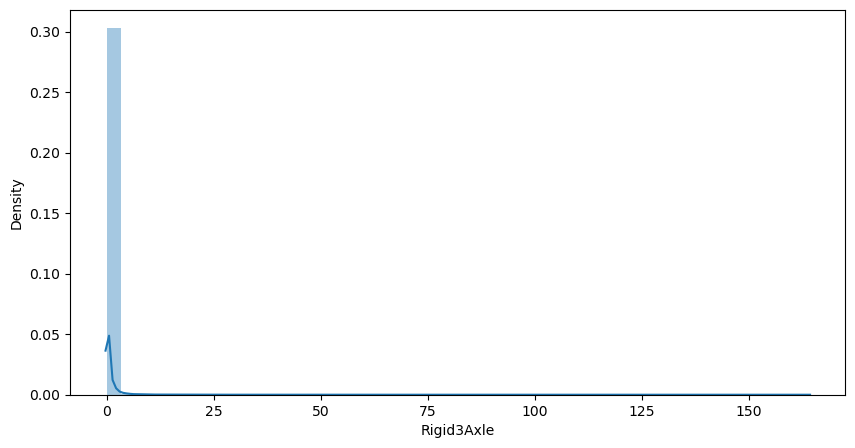

C:\Users\zhu\AppData\Local\Temp\ipykernel_22464\249945334.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[a])


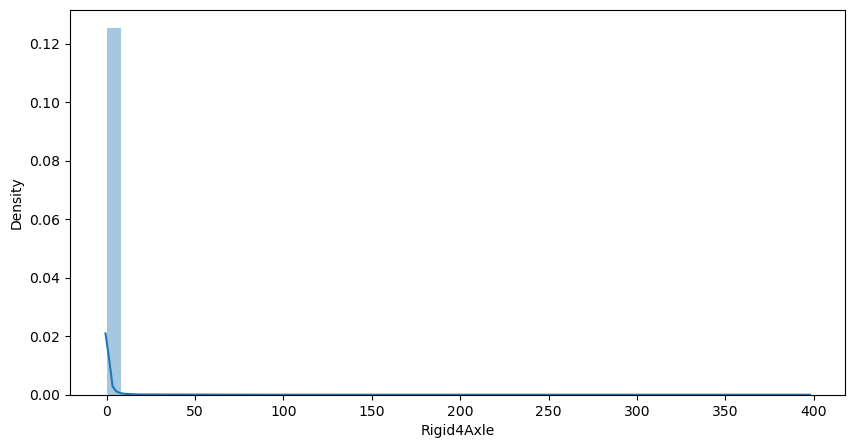

C:\Users\zhu\AppData\Local\Temp\ipykernel_22464\249945334.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[a])


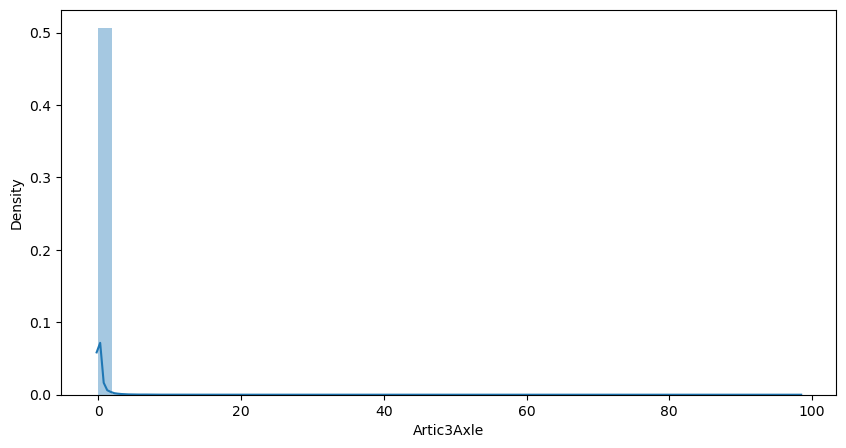

C:\Users\zhu\AppData\Local\Temp\ipykernel_22464\249945334.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[a])


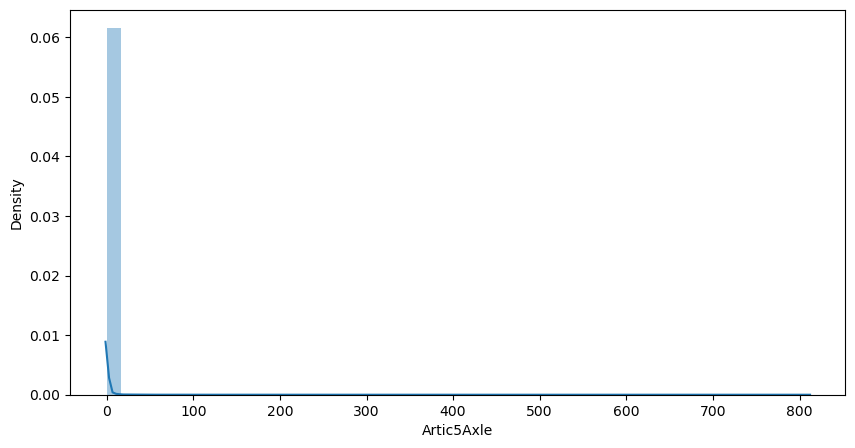

C:\Users\zhu\AppData\Local\Temp\ipykernel_22464\249945334.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[a])


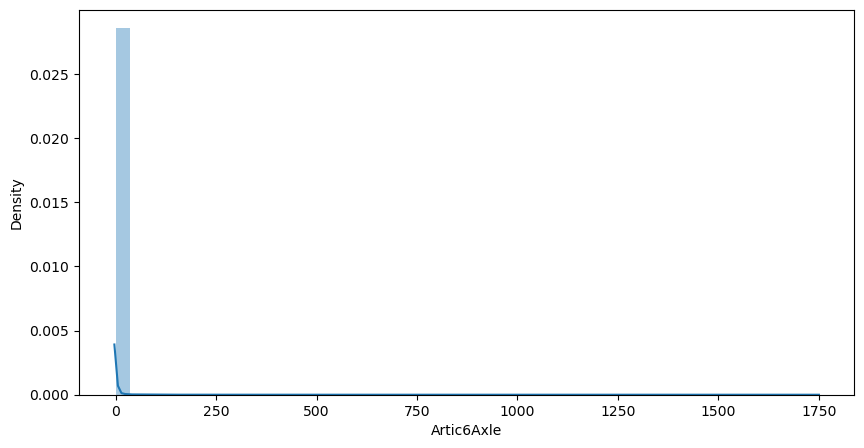

C:\Users\zhu\AppData\Local\Temp\ipykernel_22464\249945334.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[a])


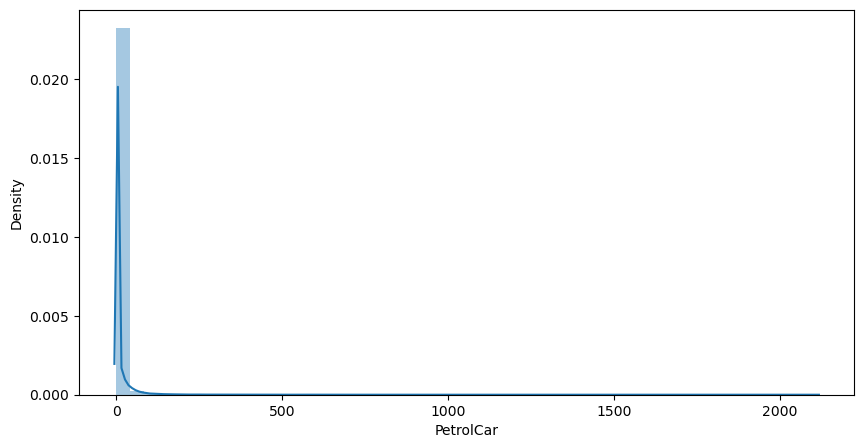

C:\Users\zhu\AppData\Local\Temp\ipykernel_22464\249945334.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[a])


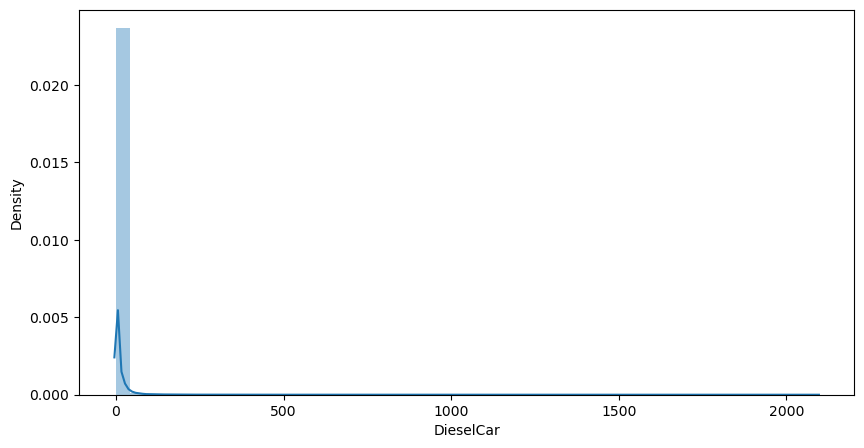

C:\Users\zhu\AppData\Local\Temp\ipykernel_22464\249945334.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[a])


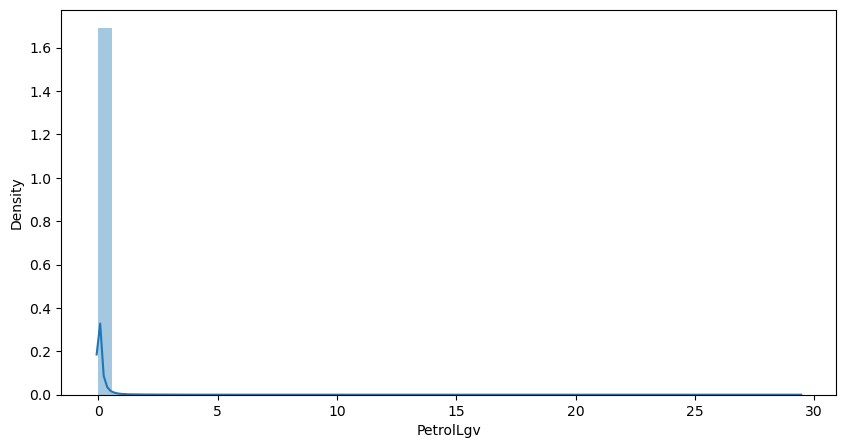

C:\Users\zhu\AppData\Local\Temp\ipykernel_22464\249945334.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[a])


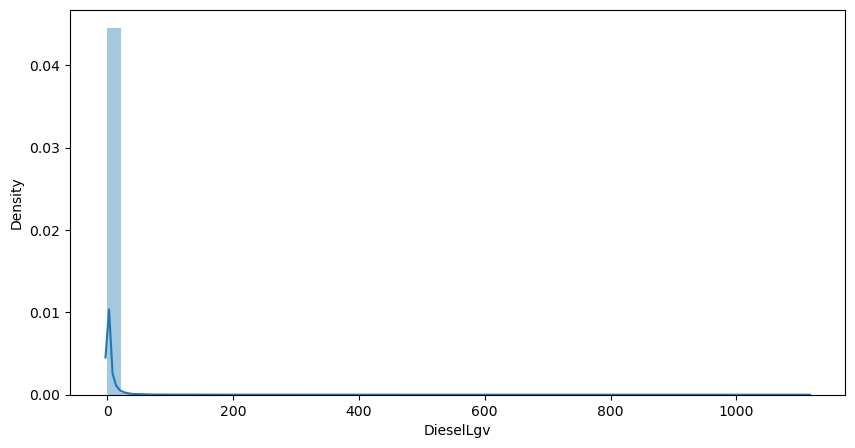

C:\Users\zhu\AppData\Local\Temp\ipykernel_22464\249945334.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[a])


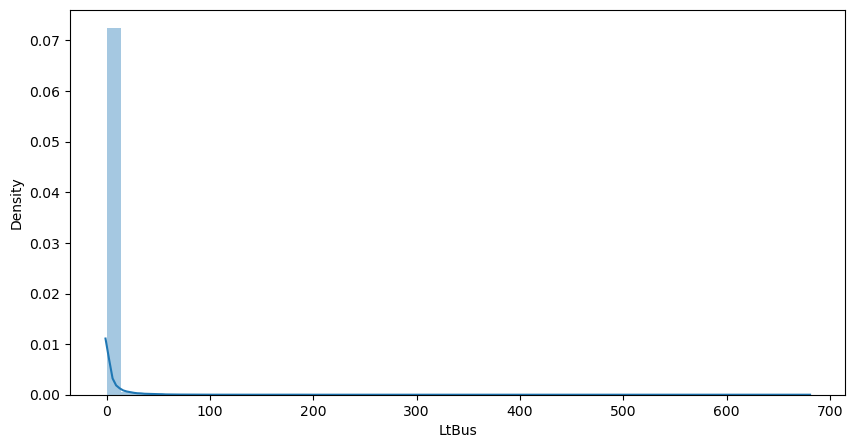

C:\Users\zhu\AppData\Local\Temp\ipykernel_22464\249945334.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[a])


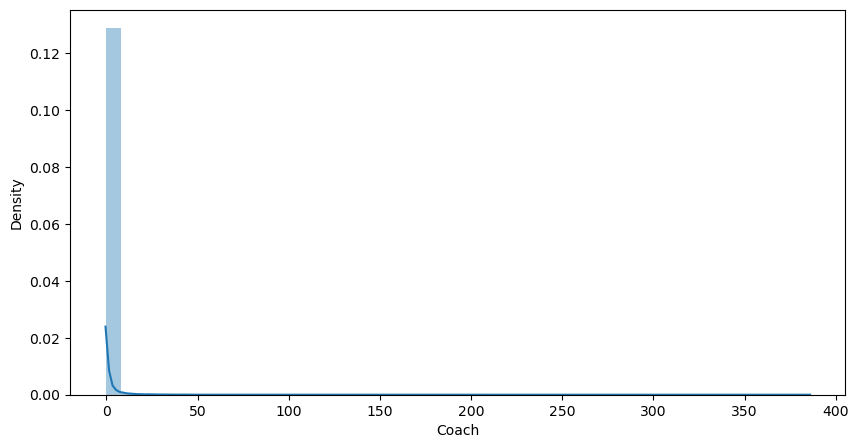

C:\Users\zhu\AppData\Local\Temp\ipykernel_22464\249945334.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[a])


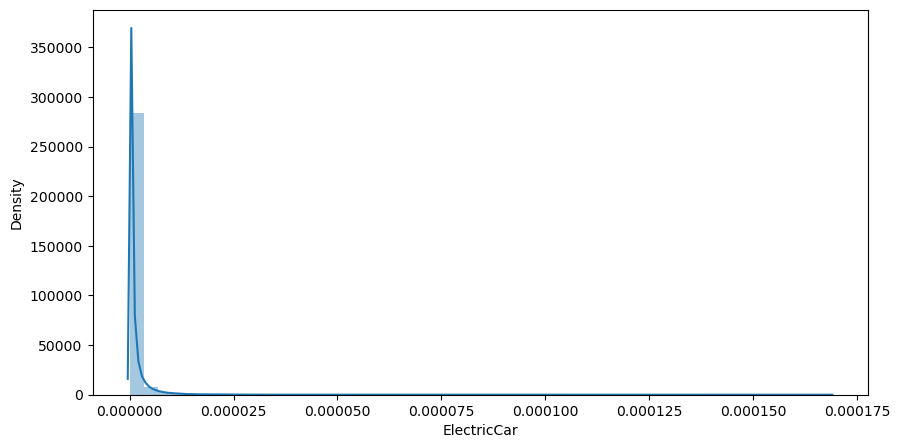

C:\Users\zhu\AppData\Local\Temp\ipykernel_22464\249945334.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[a])


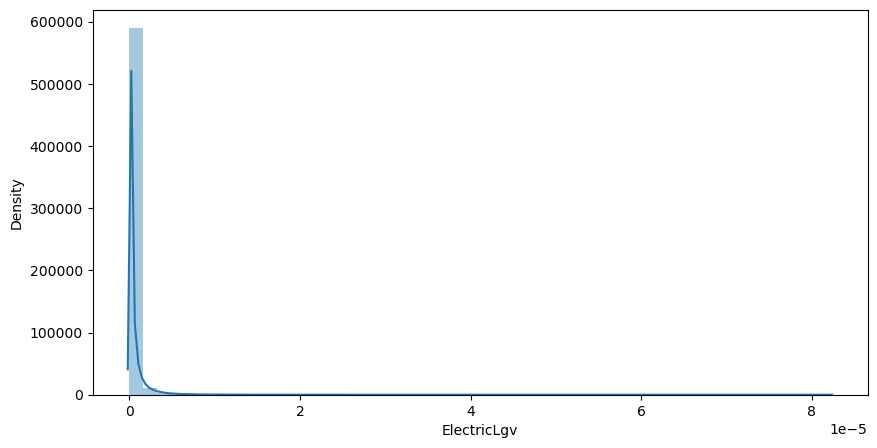

In [22]:
# plot distribution of the target variables
for a in target:
    plt.figure(figsize=(10,5))
    sns.distplot(df[a])
    plt.show()

<Figure size 1000x500 with 0 Axes>

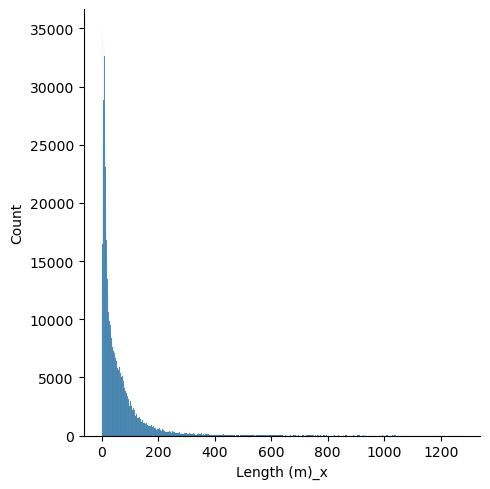

<Figure size 1000x500 with 0 Axes>

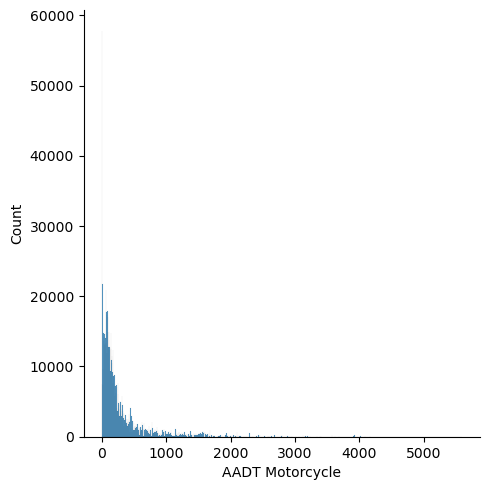

<Figure size 1000x500 with 0 Axes>

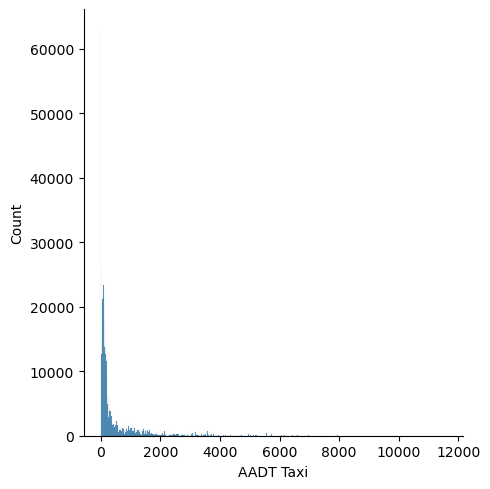

<Figure size 1000x500 with 0 Axes>

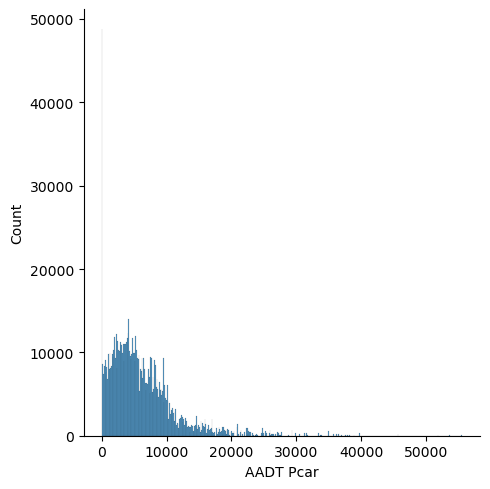

<Figure size 1000x500 with 0 Axes>

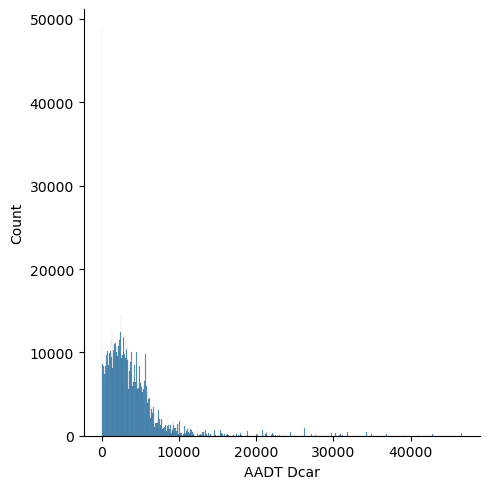

<Figure size 1000x500 with 0 Axes>

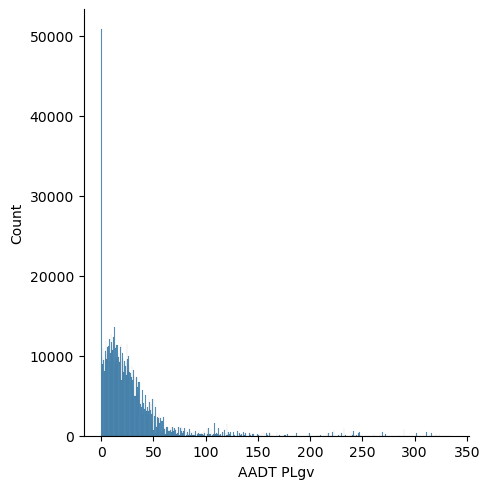

<Figure size 1000x500 with 0 Axes>

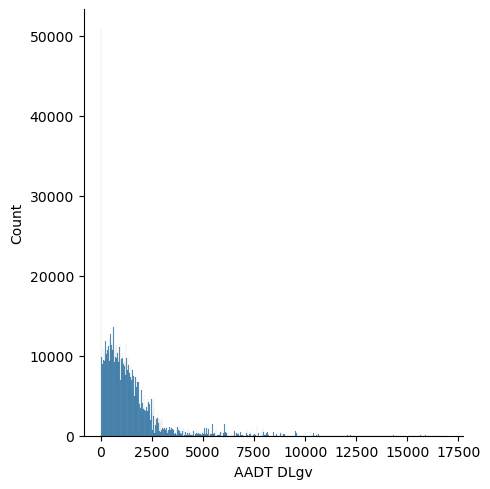

<Figure size 1000x500 with 0 Axes>

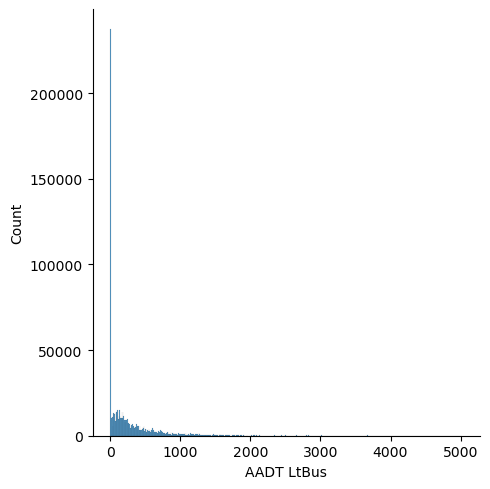

<Figure size 1000x500 with 0 Axes>

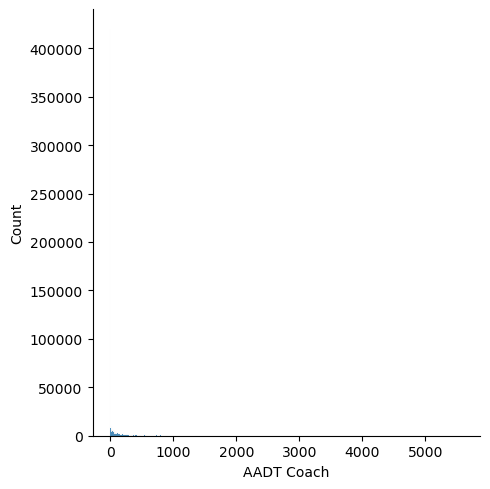

<Figure size 1000x500 with 0 Axes>

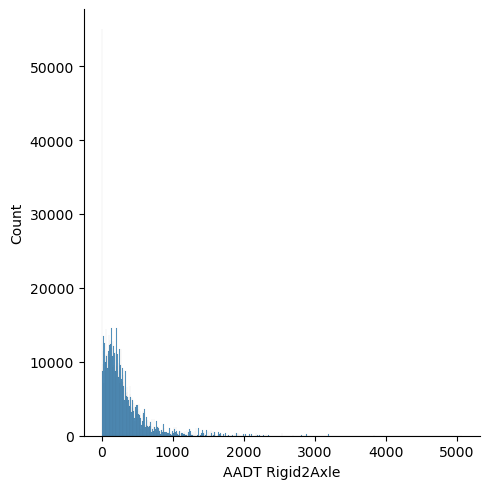

<Figure size 1000x500 with 0 Axes>

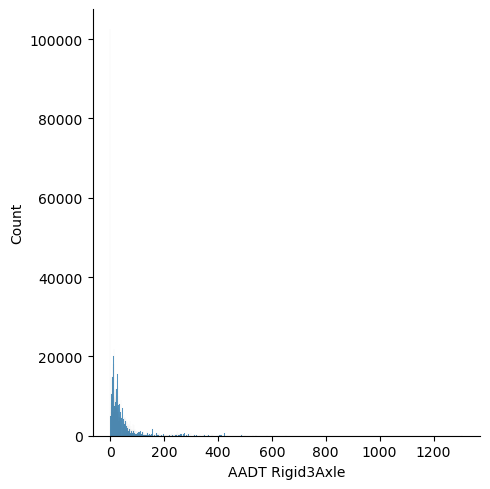

<Figure size 1000x500 with 0 Axes>

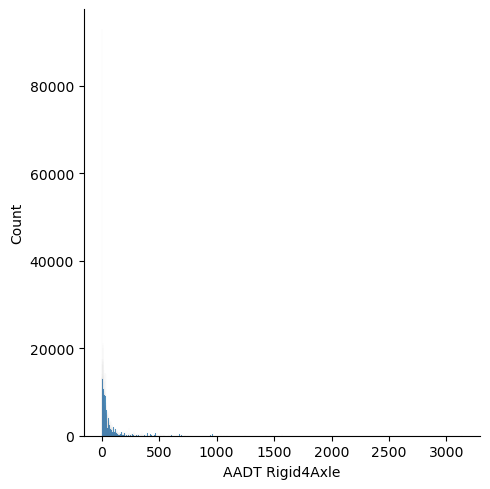

<Figure size 1000x500 with 0 Axes>

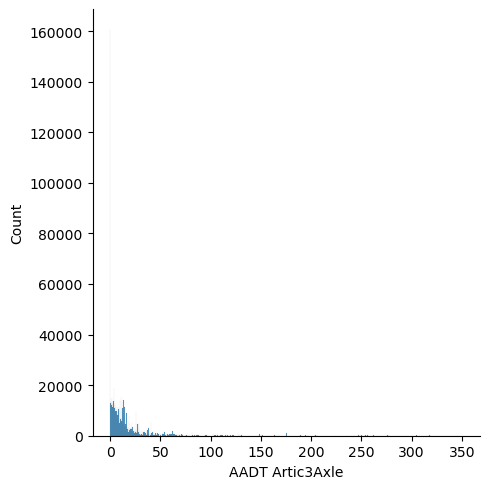

<Figure size 1000x500 with 0 Axes>

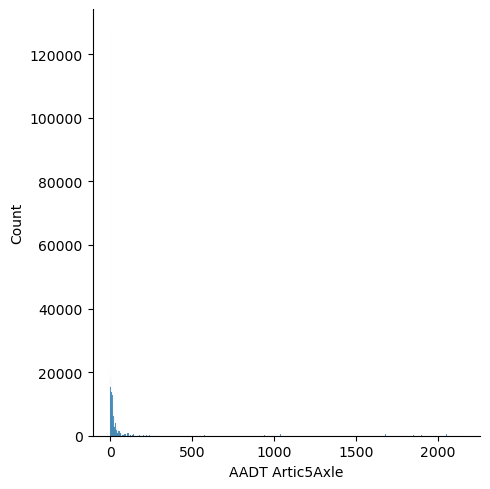

<Figure size 1000x500 with 0 Axes>

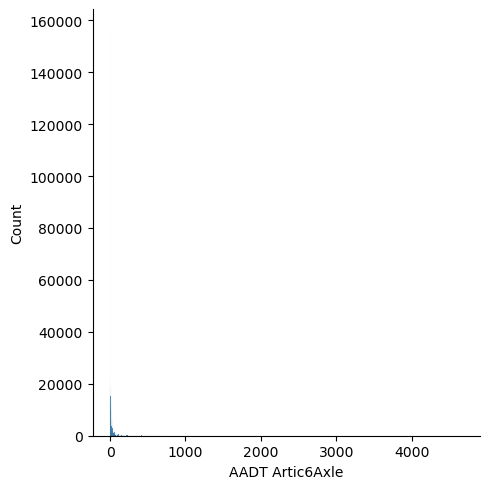

<Figure size 1000x500 with 0 Axes>

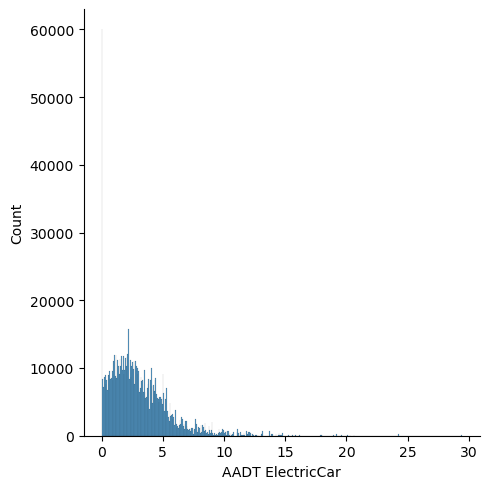

<Figure size 1000x500 with 0 Axes>

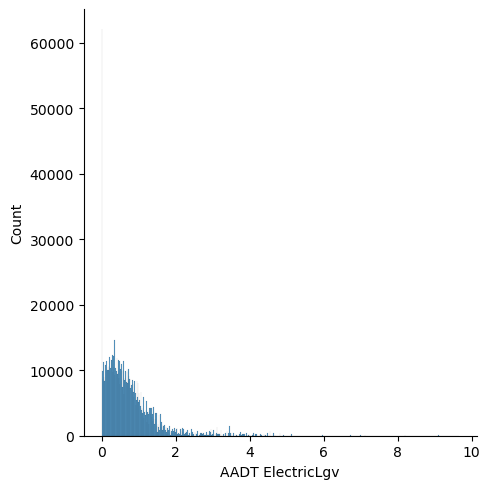

In [23]:
# plot distribution of the label variables
for a in label:
    plt.figure(figsize=(10,5))
    sns.displot(df[a])
    plt.show()

## Derive the target

In [24]:
# sum the target variables to one column
df['Total Emissions'] = df[target].sum(axis=1)

## Split data for each type of pollutants

In [25]:
# Split df by unique 'Pollutant' values into dictionary
df_dict = {k: v for k, v in df.groupby('Pollutant')}
df_dict.keys()

dict_keys(['CO2', 'NOx', 'PM10_Brake', 'PM10_Exhaust', 'PM10_Resusp', 'PM10_Tyre', 'PM25_Brake', 'PM25_Exhaust', 'PM25_Resusp', 'PM25_Tyre'])

In [26]:
for k, v in df_dict.items():
    print(k, v.shape)

CO2 (87996, 59)
NOx (87996, 59)
PM10_Brake (87996, 59)
PM10_Exhaust (87996, 59)
PM10_Resusp (87996, 59)
PM10_Tyre (87996, 59)
PM25_Brake (87996, 59)
PM25_Exhaust (87996, 59)
PM25_Resusp (87996, 59)
PM25_Tyre (87996, 59)


In [27]:
# for each group, preview total emissions and labels
for k, v in df_dict.items():
    print(k,v[['Total Emissions'] + label].head())

CO2    Total Emissions  Length (m)_x  AADT Motorcycle   AADT Taxi    AADT Pcar  \
0        35.518405     50.761449        91.075778  102.565718  2951.059048   
1         0.048222     28.592125         0.000000    0.000000     8.419569   
2         3.824804      5.101391        45.537889   51.282859  1475.529524   
3         2.817213      3.757501        45.537889   51.282859  1475.529524   
4         1.218050      1.624593        45.537889   51.282859  1475.529524   

     AADT Dcar  AADT PLgv   AADT DLgv  AADT LtBus  AADT Coach  \
0  1751.020886  10.245802  514.797973         0.0         0.0   
1     4.995780   0.000000    0.000000         0.0         0.0   
2   875.510443   5.122901  257.398987         0.0         0.0   
3   875.510443   5.122901  257.398987         0.0         0.0   
4   875.510443   5.122901  257.398987         0.0         0.0   

   AADT Rigid2Axle  AADT Rigid3Axle  AADT Rigid4Axle  AADT Artic3Axle  \
0       128.664162        12.389882        18.108290        10.

## Split the data into train and test

In [28]:
from sklearn.model_selection import train_test_split

train_test_set = {}

for k, v in df_dict.items():
    x_train, x_test, y_train, y_test = train_test_split(v[label], v['Total Emissions'], test_size=0.2, random_state=42)
    # drop indexes
    x_train = x_train.reset_index(drop=True)
    x_test = x_test.reset_index(drop=True)
    y_train = y_train.reset_index(drop=True)
    y_test = y_test.reset_index(drop=True)
    train_test_set[k] = {'x_train': x_train, 'x_test': x_test, 'y_train': y_train, 'y_test': y_test}

train_test_set.keys()

dict_keys(['CO2', 'NOx', 'PM10_Brake', 'PM10_Exhaust', 'PM10_Resusp', 'PM10_Tyre', 'PM25_Brake', 'PM25_Exhaust', 'PM25_Resusp', 'PM25_Tyre'])

## Standardize the data

In [29]:
# standardize the df using sklearn standard scaler
from sklearn.preprocessing import StandardScaler

In [30]:
# stardaize the x_train and x_test
for k, v in train_test_set.items():
    # initialize the scaler
    scaler = StandardScaler()
    # fit the scaler to the x_train
    scaler.fit(v['x_train'])
    # transform the x_train and x_test
    v['x_train'] = scaler.transform(v['x_train'])
    v['x_test'] = scaler.transform(v['x_test'])
    # save the scaler
    v['scaler'] = scaler

In [31]:
# test_df = df[['AADT Motorcycle',
#               'Length (m)_x', 'Length (m)_y'] + ['Motorcycle']]
# # standardize the test_df using sklearn standard scaler
# scalar = StandardScaler()
# test_df = scalar.fit_transform(test_df)

# # add pollutant to the transformed test_df
# test_df = pd.DataFrame(test_df, columns=['AADT Motorcycle', 'Length (m)_x', 'Length (m)_y', 'Motorcycle'])
# test_df['Pollutant'] = df['Pollutant']


# # split test_df by unique 'Pollutant' values into dictionary
# test_df_dict = {k: v for k, v in test_df.groupby('Pollutant')}

# # drop 'Pollutant' column from test_df_dict
# for k, v in test_df_dict.items():
#     test_df_dict[k] = v.drop('Pollutant', axis=1)

# # for each pollutant, split the dataframe into train and test
# from sklearn.model_selection import train_test_split
# train_test_dict = {}
# for k, v in test_df_dict.items():
#     train, test = train_test_split(v, test_size=0.2, random_state=42)
#     train_test_dict[k] = [train, test]

# # for each pollutant, split the train and test into X and y
# X_y_dict = {}
# for k, v in train_test_dict.items():
#     X_y_dict[k] = [v[0].drop('Motorcycle', axis=1), v[0]['Motorcycle'],
#                      v[1].drop('Motorcycle', axis=1), v[1]['Motorcycle']]

# # for each pollutant, train a linear regression model
# from sklearn.linear_model import LinearRegression
# model_dict = {}
# for k, v in X_y_dict.items():
#     model_dict[k] = LinearRegression().fit(v[0], v[1])

# # for each pollutant, predict y using the test X
# y_pred_dict = {}
# for k, v in model_dict.items():
#     y_pred_dict[k] = v.predict(X_y_dict[k][2])

# # for each pollutant, calculate the mean squared error
# from sklearn.metrics import mean_squared_error
# mse_dict = {}
# for k, v in y_pred_dict.items():
#     mse_dict[k] = mean_squared_error(X_y_dict[k][3], v)

# # for each pollutant, calculate the r2 score
# from sklearn.metrics import r2_score
# r2_dict = {}
# for k, v in y_pred_dict.items():
#     r2_dict[k] = r2_score(X_y_dict[k][3], v)

# # print the mean squared error and r2 score for each pollutant
# for k, v in mse_dict.items():
#     print(k, v, r2_dict[k])

# Model Development

## Model Training

### Linear Regression

In [32]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [33]:
# model set for each pollutant
LR_set = {}

for k, v in train_test_set.items():
    model = LinearRegression()
    model.fit(v['x_train'], v['y_train'])
    y_pred = model.predict(v['x_test'])
    mse = mean_squared_error(v['y_test'], y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(v['y_test'], y_pred)
    LR_set[k] = {'model': model, 'y_pred': y_pred, 'mse': mse, 'r2': r2, 'rmse': rmse, 'y_test': v['y_test'], 'x_test': v['x_test'], 'x_train': v['x_train'], 'y_train': v['y_train']}
    print(k, mse, r2, rmse)

CO2 154896.91234925814 0.6262955073919645 393.569450477623
NOx 1.3094142000390152 0.5962865791110123 1.1442963777094706
PM10_Brake 0.0020521680953018992 0.5845028860720026 0.045300861970848844
PM10_Exhaust 0.0007995399632665331 0.6000593116875312 0.0282761377006573
PM10_Resusp 0.007792232624898946 0.592464638265294 0.08827362360806848
PM10_Tyre 0.00028814306927763434 0.6517040948583188 0.016974777444126753
PM25_Brake 0.0003509214950259434 0.5673313651850173 0.01873289873527168
PM25_Exhaust 0.0005705884619683835 0.588146254712026 0.023886993573247837
PM25_Resusp 1.0591843662988177e-05 0.5948630265753472 0.003254511278669683
PM25_Tyre 0.00015412231050733816 0.6228781334033593 0.012414600698666798


### SVM Regression

In [34]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


In [35]:
# model set for each pollutant
SVR_set = {}

for k, v in train_test_set.items():
    model = SVR()
    model.fit(v['x_train'], v['y_train'])
    y_pred = model.predict(v['x_test'])
    mse = mean_squared_error(v['y_test'], y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(v['y_test'], y_pred)
    SVR_set[k] = {'model': model, 'y_pred': y_pred, 'mse': mse, 'r2': r2, 'rmse': rmse, 'y_test': v['y_test'], 'x_test': v['x_test'], 'x_train': v['x_train'], 'y_train': v['y_train']}
    print(k, mse, r2, rmse)


CO2 359550.02082024666 0.1325491511743332 599.6249001002599
NOx 0.31608959840613565 0.9025445019030914 0.5622184614597209
PM10_Brake 0.00484469812113108 0.019106625918855924 0.06960386570536926
PM10_Exhaust 0.00549965957914055 -1.7510040005748908 0.07415968971847543
PM10_Resusp 0.002049252450444939 0.8928236772591679 0.04526866963414033
PM10_Tyre 0.007425098546410351 -7.975164405208581 0.08616901152044365
PM25_Brake 0.006233615448513973 -6.6857357679692235 0.07895324849880449
PM25_Exhaust 0.00583224264457978 -3.209743338153091 0.07636912101484329
PM25_Resusp 0.004265076974011152 -162.1387727815619 0.06530755679101119
PM25_Tyre 0.00841264604376624 -19.584902786614496 0.0917204777776819


In [36]:
# grid search for the best parameters for linear regression
from sklearn.model_selection import GridSearchCV

In [37]:
# grid search for the best parameters for linear regression from SVR set
for k, v in SVR_set.items():
    # initialize the model
    model = SVR()
    # define the parameters
    parameters = {'kernel': ['rbf', 'linear', 'poly', 'sigmoid'],
                  'C': [0.1, 1, 10, 100, 1000],
                  'gamma': [1, 0.1, 0.01, 0.001, 0.0001]
                  }
    # initialize the grid search
    grid = GridSearchCV(model, parameters, cv=5, scoring='neg_mean_squared_error')
    # fit the grid search
    grid.fit(v['x_train'], v['y_train'])
    # save the best parameters
    v['best_params'] = grid.best_params_
    print(k, grid.best_params_)
    # save the best model
    v['best_model'] = grid.best_estimator_
    # save the best y_pred
    v['best_y_pred'] = grid.best_estimator_.predict(v['x_test'])
    # save the best mse
    v['best_mse'] = mean_squared_error(v['y_test'], v['best_y_pred'])
    # save the best rmse
    v['best_rmse'] = np.sqrt(v['best_mse'])
    # save the best r2
    v['best_r2'] = r2_score(v['y_test'], v['best_y_pred'])
    print(k, v['best_mse'], v['best_r2'], v['best_rmse'])

### Decision Tree Regression

In [ ]:
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.multioutput import MultiOutputRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

In [ ]:
# model set for each pollutant
DTR_set = {}

for k, v in train_test_set.items():
    model = MultiOutputRegressor(DecisionTreeRegressor(max_depth=5, random_state=42))
    model.fit(v['x_train'], v['y_train'])
    y_pred = model.predict(v['x_test'])
    mse_score = mean_squared_error(v['y_test'], y_pred)
    r2_score = r2_score(v['y_test'], y_pred)
    DTR_set[k] = {'model': model, 'y_pred': y_pred, 'mse_score': mse_score, 'r2_score': r2_score}

In [ ]:
# print the mse_score and r2_score for each pollutant model
for k, v in DTR_set.items():
    print(k, v['mse_score'], v['r2_score'])

#### DT Visualisation 

In [ ]:
for k, v in DTR_set.items():
    fig, ax = plt.subplots(figsize=(18, 12))
    plot_tree(v['model'].estimators_[0], ax=ax)
    plt.title(f"Decision Tree for {k}")
    plt.show()

### Random Forest Regression

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

In [ ]:
RFR_set = {}

for k, v in train_test_set.items():

In [ ]:
# feature selection
fs = SelectKBest(f_regression, k=10)
x_train_fs = fs.fit_transform(v['x_train'], v['y_train'])
x_test_fs = fs.transform(v['x_test'])

In [ ]:
# hyperparameter tuning
param_grid = {'n_estimators': [100, 200, 500],
              'max_depth': [3, 5, 7]}
grid_search = GridSearchCV(RandomForestRegressor(random_state=42), 
                                                 param_grid, cv=5)
grid_search.fit(x_train_fs, v['y_train'])
best_params = grid_search.best_params_

In [ ]:
# train model with best hyperparameters
model = RandomForestRegressor(n_estimators=best_params['n_estimators'], 
                              max_depth=best_params['max_depth'], 
                              random_state=42)
model.fit(x_train_fs, v['y_train'])
y_pred = model.predict(x_test_fs)
mse_score = mean_squared_error(v['y_test'], y_pred)
r2 = r2_score(v['y_test'], y_pred)

In [ ]:
# store results in dictionary
RFR_set[k] = {'model': model, 'y_pred': y_pred, 'mse_score': mse_score, 'r2_score': r2}


In [ ]:
# print the mse_score and r2_score for each pollutant model
for k, v in RFR_set.items():
    print(k, v['mse_score'], v['r2_score'])